## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [1]:
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
len(penguins)

344

In [5]:
len(penguins.dropna())

333

Since the difference is minimal, we're able to drop the empty rows

In [6]:
penguins = penguins.dropna()

In [7]:
features= ['bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt.fit(penguins[features], penguins['species'])

DecisionTreeClassifier(max_depth=1)

In [8]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

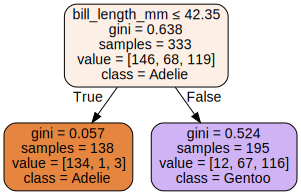

In [9]:
plot_tree_classification(dt, features, penguins.species.unique())

This is currently our trained model. The point of this is to divide it into 2 'unmixed' sets. <br>
Here it asks if the bill_length is smaller than 42, it'll be an Adelie species.

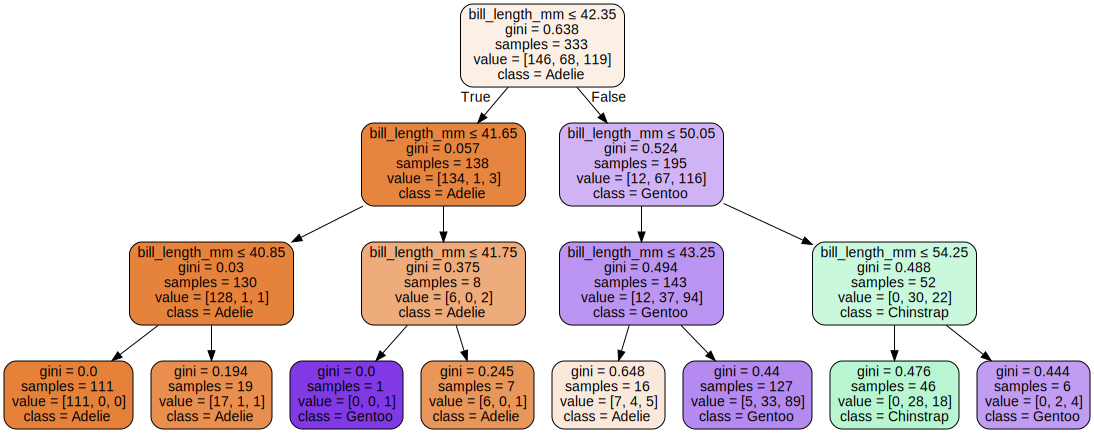

In [10]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(penguins[features], penguins['species'])
plot_tree_classification(dt, features, penguins.species.unique())

The more depth you add, the more complex the questioning gets.

## Calculate accuracy

In [11]:
predictions = dt.predict(penguins[features])

In [12]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [13]:
calculate_accuracy(predictions, penguins.species)

0.7897897897897898

We're now going to split the model into 70% train and 30% test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(train.shape, test.shape)

(233, 7) (100, 7)


In [16]:
features= ['bill_length_mm']
dt_classification = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt_classification.fit(train[features], train['species'])

DecisionTreeClassifier(max_depth=1)

In [17]:
predictionsOnTrainset = dt_classification.predict(train[features])
predictionsOnTestset = dt_classification.predict(test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.759656652360515
Accuracy on test set 0.73


Since the training set is the one that actually sees the model, we want this accuracy to be as high as possible. <br>
Since the test set is biased, we don't want the set to be accurate.